<img src="assets/images/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Classification

## Learning Objectives / Agenda

- Introduction to Classification

- kNN

- Logistic Regression

## <font style='color: red'>But first...</font>

### ...where are we in the Data Science Workflow?

<br />

<img src="assets/images/ds_workflow_interpret.png" style="width: 700px;">

<br />

# <font style = 'color:blue'>Introduction to Classification</font>

---

So far, we’ve worked primarily with regression problems.  We’ve focused on predicting a continuous set of values.

However, for other problems, we need to predict responses.  

E.g.: 
- A loan will default or it won’t. 
- An email is spam or isn’t spam.

**Classification** is a machine learning problem for solving a set response given the knowledge we have about that value.


### Types of classification

Binary classification is the simplest form of classification.

However, classification problems can have multiple classifications labels.  

Instead of predicting whether the pixel is red or blue, you could predict whether the pixel is red, blue, or green.

<img src="assets/images/classification_1.png" style="width:60%" />


A class label is a representation of what we are trying to predict:  our target.

Examples of class labels:

<img src="assets/images/classification_2.png" style="width:60%" />

# <font style = 'color:blue'>What is K-Nearest Neighbours?</font>
---

K Nearest Neighbors (KNN) is a classification algorithm that makes a prediction based upon the closest data points.

KNN is a supervised learning method; therefore, the training data must have known target values.




kNN is a **non-parametric model**. So, the model is not represented as an equation with parameters (e.g. the $\beta$ values in linear regression).

> You may have heard of the clustering algorithm **k-Means Clustering**. These techniques have nothing in common, aside from both having a parameter k!



The process of of prediction using KNN is fairly straightforward:

- Pick a value for K.


- Search for the K observations in the data that are "nearest" to the measurements of the new data point with the unknown label.
    - Euclidian distance is often used as the distance metric, but other metrics are allowed.
  
  
- Use the most popular response value from the K "nearest neighbors" as the predicted response value for the new data point.


# <font style = 'color:blue'>First look at KNN</font>
---



Let's look at some data where we have class labels: the standard example is the Iris data set.

<img src="assets/images/iris_overview.png" style="width: 700px;">

The Iris dataset is a famous machine learning dataset, created in the 1930s by R. Fisher.  It's very complete (and not very big), but is often used for learning about classification models.

The dataset comes from UCI (University of California Irvine), which is itself a great source of datasets:

https://archive.ics.uci.edu/ml/datasets/iris
<br />
https://archive.ics.uci.edu/ml/index.php

In [4]:
# Read the iris data into a DataFrame.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display plots in-notebook
%matplotlib inline
from sklearn import metrics
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

data = 'assets/data/iris.data'
df = pd.read_csv(data)

<a id="terminology"></a>
### Terminology

- **150 observations** (n=150): Each observation is one iris flower.
- **Four features** (p=4): sepal length, sepal width, petal length, and petal width.
- **Response**: One of three possible iris species (setosa, versicolor, or virginica)
- **Classification problem** because response is categorical (i.e. a discrete value).

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


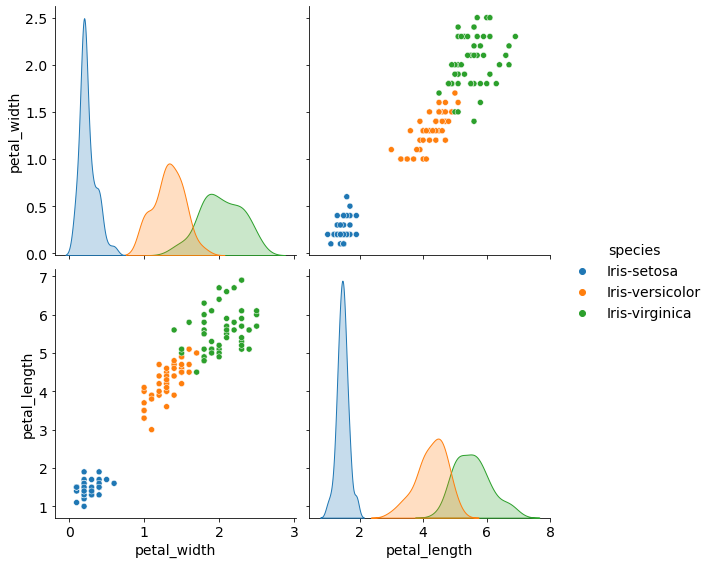

In [3]:
sns.pairplot(df[["petal_width", "petal_length", "species"]], hue="species", height=4);

<a id="knn-classification-map-for-iris-k"></a>
### KNN Classification Map for Iris (K=1)

![1NN classification map](./assets/images/iris_01nn_map.png)

The following visualizations show how a given area can change in its prediction as K changes.


- Colored points represent true values and colored areas represent a **prediction space**. (This is called a Voronoi Diagram.)


- Each prediction space is where the majority of the "K" nearest points are the color of the space.

- To predict the class of a new point, we guess the class corresponding to the color of the space it lies in.


### KNN Classification Map for Iris (K=5)

![5NN classification map](./assets/images/iris_05nn_map.png)

### KNN Classification Map for Iris (K=15)

![15NN classification map](./assets/images/iris_15nn_map.png)

<a id="knn-classification-map-for-iris-k"></a>
### KNN Classification Map for Iris (K=50)

![50NN classification map](./assets/images/iris_50nn_map.png)

We can see that, as K increases, the classification spaces' borders become more distinct. 


**How are outliers affected by K?** 

As K increases, outliers are "smoothed out". Look at the above three plots and notice how outliers strongly affect the prediction space when K=1. 

When K=50, outliers no longer affect region boundaries. 

This is a classic bias-variance tradeoff -- with increasing K, the bias increases but the variance decreases.

The preferred value of $k$ is usually **odd**. Why?

The possibility of a tie.

- This could happen in binary classification if we use an even number for k.  This could also happen if there are multiple class labels.

- In sklearn, it will choose the class that it first saw in the training set.


### Advantages

- simple to understand
- there is no "training" as such: we have to check the neighbours on the fly

### Disadvantages

- prediction can take longer for large datasets. Since KNN works with distance, higher dimensionality of data (i.e. more features) requires significantly more samples in order to have the same predictive power.

- With more dimensions, all points slowly start averaging out to be equally distant. 

- it doesn't tell us anything about feature importance


# <font style = 'color:blue'>KNN on Iris</font>
---

Now, let's train a KNN model on this dataset.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



### Classification Metrics

For KNN, we’ll use accuracy as our primary metric.

- Accuracy is the number of correct predictions out of all predictions in the sample. This is a value we want to maximize.

$$Accuracy = \frac{total~predicted~correct}{total~predicted}$$

How do we take accuracy, and construct a easily understandable reference to understand the model performance?


### Confusion Matrix

A confusion matrix is a matrix (table) that can be used to measure the performance of an machine learning algorithm, usually a supervised learning one. 

Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class.

In a 2-class case, i.e. "negative" and "positive", the confusion matrix may look like this:
    
<img src="assets/images/confusion_matrix_1.png" style="width:40%" />

The fields of the matrix mean the following:
    
<img src="assets/images/confusion_matrix_2.png" style="width:40%" />

Yes, there's a typo here...

<a id="accuracy-true-positive-rate-and-false-negative-rate"></a>
### Accuracy, True Positive Rate, and False Negative Rate


Consider a binary classification problem where we have 165 observations/rows of people who are either smokers or nonsmokers.

- There are 60 in class 0, nonsmokers, and 105 observations in class 1, smokers


- We have 55 predictions of class 0, predicted as nonsmokers, and 110 of class 1, predicted to be smokers.



<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

- **True positives (TP):** These are cases in which we predicted yes (smokers), and they actually are smokers.
- **True negatives (TN):** We predicted no, and they are nonsmokers.
- **False positives (FP):** We predicted yes, but they were not actually smokers: Type I error.
- **False negatives (FN):** We predicted no, but they are smokers: Type II error.



<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**Accuracy:** Overall, how often is the classifier correct?

<span>
    (<span style="color: green">TP</span>+<span style="color: red">TN</span>)/<span style="color: blue">total</span> = (<span style="color: green">100</span>+<span style="color: red">50</span>)/<span style="color: blue">165</span> = 0.91

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom; color: blue">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center; background-color: red">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center; background-color: green">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**True positive rate (TPR)** asks, “Out of all of the target class labels, how many were accurately predicted to belong to that class?”

For example, given a medical exam that tests for cancer, how often does it correctly identify patients with cancer?

<span>
<span style="color: green">TP</span>/<span style="color: blue">actual yes</span> = <span style="color: green">100</span>/<span style="color: blue">105</span> = 0.95


<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center;background-color: green">TP = 100</td>
    <td style="text-align: center;color: blue">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**False positive rate (FPR)** asks, “Out of all items not belonging to a class label, how many were predicted as belonging to that target class label?”

For example, given a medical exam that tests for cancer, how often does it trigger a “false alarm” by incorrectly saying a patient has cancer?

<span>
<span style="color: orange">FP</span>/<span style="color: blue">actual no</span> = <span style="color: orange">10</span>/<span style="color: blue">60</span> = 0.17


<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center;background-color: orange">FP = 10</td>
    <td style="text-align: center;color:blue">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**Can you see that we might weigh TPR AND FPR differently depending on the situation?**

- An example when we care about TPR, but not FPR.



During an initial medical diagnosis, we want to be sensitive. We want initial screens to come up with a lot of true positives, even if we get a lot of false positives.


- An example when we care about FPR, but not TPR.



If we are doing spam detection, we want to be precise. Anything that we remove from an inbox must be spam, which may mean accepting fewer true positives.



# <font style = 'color:blue'>Improving the performance of the KNN classifier</font>
---


Let's look at how well the KNN classifier performs, and how we then go about improving its performance.

<a id="using-the-traintest-split-procedure-k"></a>


### Using the Train/Test Split Procedure (K=1)

#### Step 1: Split X and y into training and testing sets (using `random_state` for reproducibility).

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("species", axis=1), df["species"], random_state=99)

#### Step 2: Train the model on the training set (using K=1).

In [10]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Step 3: Test the model on the testing set and check the accuracy.

In [11]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9210526315789473


#### Repeating for K=7.

In [12]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9473684210526315


#### Comparing Testing Accuracy With Null Accuracy

Null accuracy is the accuracy that can be achieved by **always predicting the most frequent class**. For example, if most species are Setosa, we would always predict Setosa.

The null accuracy is a benchmark against which you may want to measure every classification model.

#### Examine the class distribution from the training set.

Remember that we are comparing KNN to this simpler model. So, we must find the most frequent class **of the training set**.

In [9]:
most_freq_class = y_train.value_counts().index[0]

print(y_train.value_counts())
most_freq_class

Iris-setosa        38
Iris-virginica     38
Iris-versicolor    36
Name: species, dtype: int64


'Iris-setosa'

#### Compute null accuracy.

In [10]:
y_test.value_counts()[most_freq_class] / len(y_test)

0.3157894736842105

<a id="tuning-a-knn-model"></a>

# <font style = 'color:blue'>Tuning a KNN Model</font>

---

Now that we've seen how well our initial model performs, let's see how we can improve its performance.

In [13]:
# Instantiate the model (using the value K=5).
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model with data.
knn.fit(X_train, y_train)

# Store the predicted response values.
y_pred_class = knn.predict(X_test)

<a id="what-happen-if-we-view-the-accuracy-of-our-training-data"></a>
### What Happens If We View the Accuracy of our Training Data?

In [14]:
scores = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_train)
    acc_score = float(sum(pred == y_train)) / len(y_train)
    scores.append([k, acc_score])

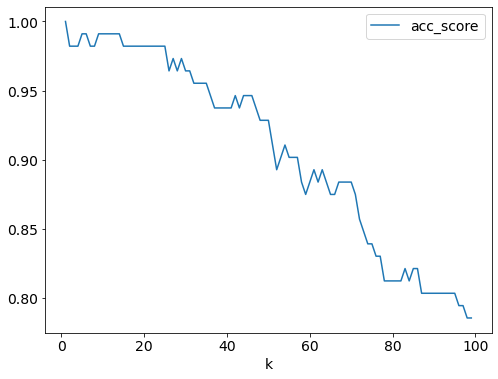

In [13]:
data = pd.DataFrame(scores,columns=['k','acc_score'])
data.plot.line(x='k',y='acc_score');

In [15]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.

k_range = list(range(1, 101))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X_train)
    training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [16]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
performance_df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)


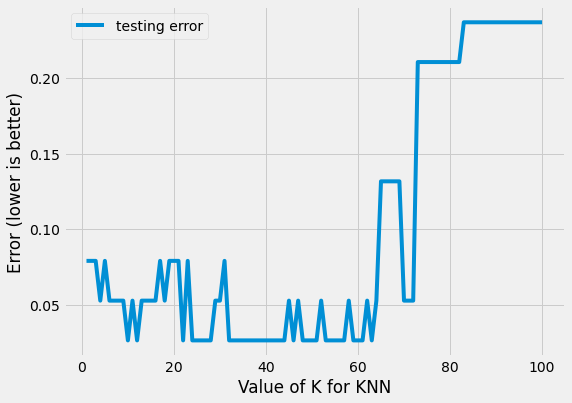

In [16]:
plt.style.use('fivethirtyeight')

# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
performance_df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

<a id="training-error-versus-testing-error"></a>
### Training Error Versus Testing Error

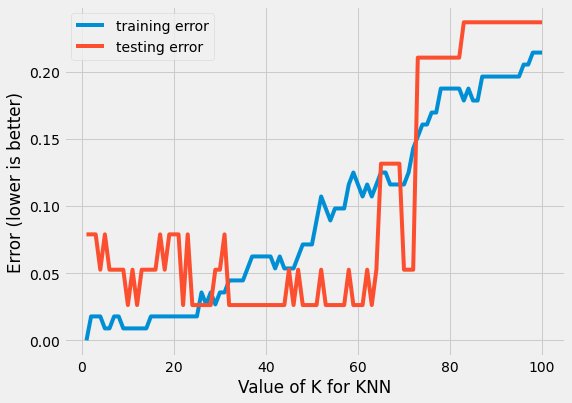

In [17]:
# Plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR.
performance_df.plot();
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

- **Training error** decreases as model complexity increases (lower value of K).
- **Testing error** is minimized at the optimum model complexity.



Evaluating the training and testing error is important. For example:

- If the training error is much lower than the test error, then our model is likely overfitting. 
- If the test error starts increasing as we vary a hyperparameter, we may be overfitting.
- If either error plateaus, our model is likely underfitting (not complex enough).

<a id="standardising-features"></a>


# <font style = 'color:blue'>Standardising Features</font>

---



There is one major issue that applies to many machine learning models: They are sensitive to feature scale. 

> KNN in particular is sensitive to feature scale because it (by default) uses the Euclidean distance metric. To determine closeness, Euclidean distance sums the square difference along each axis. So, if one axis has large differences and another has small differences, the former axis will contribute much more to the distance than the latter axis.

This means that it matters whether our feature are centered around zero and have similar variance to each other.

Unfortunately, most data does not naturally start at a mean of zero and a shared variance. Other models tend to struggle with scale as well, even linear regression, when you get into more advanced methods such as regularization.

Fortuantely, this is an easy fix.

<a id="use-standardscaler-to-standardize-our-data"></a>
### Use `StandardScaler` to Standardize our Data

StandardScaler standardizes our data by subtracting the mean from each feature and dividing by its standard deviation.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Fit a KNN model and look at the testing error.


In [20]:
# Calculate testing error.
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy

print(testing_error)

0.052631578947368474


<a id="comparing-knn-with-other-models"></a>

# <font style = 'color:blue'>Comparing KNN With Other Models</font>

---

**Advantages of KNN:**

- It's simple to understand and explain.
- Model training is fast.
- It can be used for classification and regression (for regression, take the average value of the K nearest points!).
- Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.



**Disadvantages of KNN:**

- It must store all of the training data.
- Its prediction phase can be slow when n is large.
- It is sensitive to irrelevant features.
- It is sensitive to the scale of the data.
- Accuracy is (generally) not competitive with the best supervised learning methods.